In [1]:
import json
from pathlib import Path

In [19]:
files = list(Path("../if/pfam/").glob("*.json"))

In [29]:
# a useful analogy in this case would be
# protein = sentence, classified domain = word
# (though we have no notion of order here)
domain_groups_frequency = {} # all sentences
domain_participation = {} # in how many different sentences does a word appear
domains_by_protein = [] # amount of domains in each protein

In [30]:
for file in files:
    with open(file) as f:
        data = json.load(f)
    domains = data[file.stem.lower()]["Pfam"].keys()
    domains_by_protein.append(len(domains))
    sentence = ";".join(sorted(domains))
    
    if sentence not in domain_groups_frequency:
        
        for domain in domains:
            domain_participation[domain] = domain_participation.get(domain, 0) + 1
            
    domain_groups_frequency[sentence] = domain_groups_frequency.get(sentence, 0) + 1

Text(0, 0.5, 'Proteins')

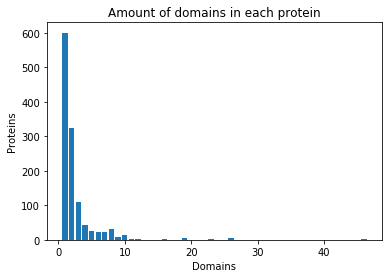

In [35]:
import matplotlib.pyplot as plt
from collections import Counter
amount_by_length = Counter(domains_by_protein)
plt.bar(amount_by_length.keys(), amount_by_length.values())
plt.title("Amount of domains in each protein")
plt.xlabel("Domains")
plt.ylabel("Proteins")

Text(0, 0.5, 'Domain groups')

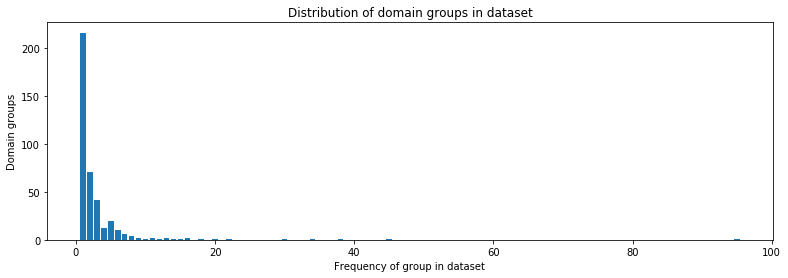

In [49]:
amount_by_appearances = Counter(domain_groups_frequency.values())
plt.figure(figsize=(13,4))
plt.bar(amount_by_appearances.keys(), amount_by_appearances.values())
plt.title("Distribution of domain groups in dataset")
plt.xlabel("Frequency of group in dataset")
plt.ylabel("Domain groups")

Text(0, 0.5, 'Domains')

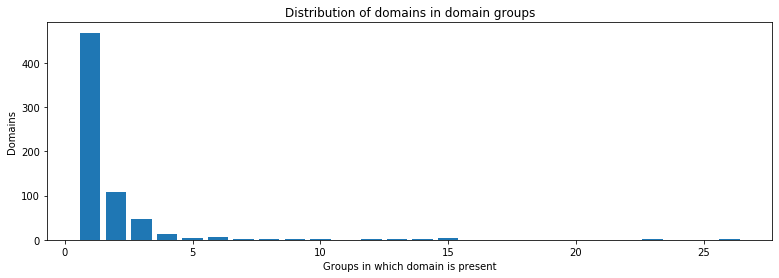

In [50]:
amount_by_participation = Counter(domain_participation.values())
plt.figure(figsize=(13,4))
plt.bar(amount_by_participation.keys(), amount_by_participation.values())
plt.title("Distribution of domains in domain groups")
plt.xlabel("Groups in which domain is present")
plt.ylabel("Domains")

In [ ]:
#policy: two proteins are in the same cluster (family) if they share at least one domain